Task 1. Solve classification task (10 points) 

First Second name PLEASE
**Naryshov Ernar**

In [62]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
from torch.utils.data import DataLoader,Dataset
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

1. Data preparation 

In [7]:
# !pip install tensorflow_datasets



[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [64]:
ds = tfds.load('beans', split='train', shuffle_files=True)

In [65]:
ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(500, 500, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [66]:
df = tfds.as_dataframe(ds)

In [67]:
df.head()

,image,label
0,"[[[149, 132, 106], [141, 124, 98], [134, 118, ...",1
1,"[[[97, 88, 57], [97, 86, 56], [105, 91, 64], [...",1
2,"[[[60, 146, 85], [61, 147, 86], [71, 153, 91],...",0
3,"[[[113, 87, 70], [112, 86, 69], [110, 84, 69],...",0
4,"[[[13, 15, 14], [15, 17, 16], [13, 15, 14], [6...",1


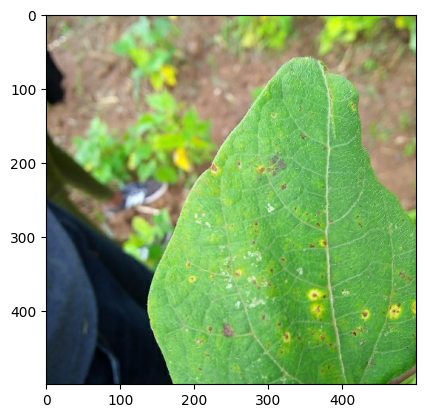

In [68]:
plt.imshow(df['image'][0], cmap='gray')

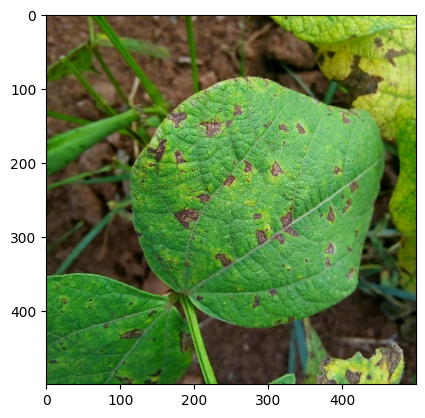

In [69]:
plt.imshow(df['image'][3], cmap='gray')

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(df['image']), np.array(df['label']), test_size=0.2, random_state=10)

In [93]:

# train_test_split = train_test_split.map(lambda x: (tf.image.resize(x['image'], (224, 224)), x['label']))
# train_test_split = train_test_split.batch(32)

In [109]:
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPool2D
# from keras.layers import Flatten
# from keras.layers import Dense

# classifier= Sequential()


# classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(150,150,3), activation='relu'))
# # layers.BatchNormalization(),

# classifier.add(MaxPool2D(pool_size=(2,2)))

# classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
# # layers.BatchNormalization(),

# classifier.add(MaxPool2D(pool_size=(2,2)))

# classifier.add(Flatten())

# classifier.add(Dense(64, activation='relu'))
# # layers.BatchNormalization(),

# classifier.add(Dense(1, activation='softmax'))

# #classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # classifier.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])
# classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

# classifier.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 69, 69, 64)        51264     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 34, 34, 64)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 73984)             0         
                                                                 
 dense_22 (Dense)            (None, 64)              

In [110]:
# X_train = np.array([np.array(val) for val in X_train])
# y_train = np.array([np.array(val) for val in y_train])
# X_train = tf.cast(X_train , dtype=tf.float32)
# y_train = tf.cast(y_train, dtype=tf.float32)


In [111]:
# X_test = np.array([np.array(val) for val in X_test])
# y_test = np.array([np.array(val) for val in y_test])
# X_test = tf.cast(X_test , dtype=tf.float32)
# y_test = tf.cast(y_test , dtype=tf.float32)


In [115]:
# X_train = tf.image.resize(X_train, [150, 150])
# X_test = tf.image.resize(X_test, [150, 150])

In [112]:
# import warnings
# warnings.filterwarnings('ignore')

In [113]:
# from keras.callbacks import EarlyStopping

# earlystop = EarlyStopping(monitor='val_loss', patience=5)

# from keras.callbacks import EarlyStopping, ModelCheckpoint

# earlystop = EarlyStopping(monitor='val_loss', patience=5)

# checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)




In [142]:
# X_train.shape

TensorShape([827, 150, 150, 3])

In [117]:
# history = classifier.fit(X_train, y_train, epochs=5,
#                          validation_data=(X_test, y_test),
#                          callbacks=[earlystop, checkpoint])

Epoch 1/5
26/26 [==============================] - 34s 1s/step - loss: 0.0000e+00 - accuracy: 0.3362 - val_loss: 0.0000e+00 - val_accuracy: 0.3382
Epoch 2/5
26/26 [==============================] - 28s 1s/step - loss: 0.0000e+00 - accuracy: 0.3362 - val_loss: 0.0000e+00 - val_accuracy: 0.3382
Epoch 3/5
26/26 [==============================] - 28s 1s/step - loss: 0.0000e+00 - accuracy: 0.3362 - val_loss: 0.0000e+00 - val_accuracy: 0.3382
Epoch 4/5
26/26 [==============================] - 27s 1s/step - loss: 0.0000e+00 - accuracy: 0.3362 - val_loss: 0.0000e+00 - val_accuracy: 0.3382
Epoch 5/5
26/26 [==============================] - 28s 1s/step - loss: 0.0000e+00 - accuracy: 0.3362 - val_loss: 0.0000e+00 - val_accuracy: 0.3382


In [ ]:
# history = classifier.fit(X_train, y_train,
#                          # steps_per_epoch=X_train.n // X_train.batch_size,
#                          epochs=5,
#                          validation_data=(X_test, y_test),
#                          # validation_steps=X_test.n // X_test.batch_size,
#                          callbacks=[earlystop, checkpoint])

In [ ]:
# history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


In [ ]:
#_______________---------------------________________#

In [122]:
import tensorflow as tf
import tensorflow_datasets as tfds

ds_train = tfds.load('beans', split='train[:80%]', as_supervised=True)
ds_val = tfds.load('beans', split='train[80%:]', as_supervised=True)

In [123]:
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    image = tf.image.resize(image, (224, 224))
    return image, label

In [124]:
ds_train = ds_train.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val = ds_val.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

batch_size = 32 #64, 16
epochs = 10 #5,25

In [146]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [121]:
history = model.fit(ds_train.batch(batch_size),
                    epochs=epochs,
                    validation_data=ds_val.batch(batch_size))


Epoch 1/10
26/26 [==============================] - 56s 2s/step - loss: 1.4922 - accuracy: 0.3640 - val_loss: 1.0796 - val_accuracy: 0.4300
Epoch 2/10
26/26 [==============================] - 52s 2s/step - loss: 1.0373 - accuracy: 0.4680 - val_loss: 0.9806 - val_accuracy: 0.5604
Epoch 3/10
26/26 [==============================] - 51s 2s/step - loss: 0.9109 - accuracy: 0.5985 - val_loss: 0.8526 - val_accuracy: 0.6280
Epoch 4/10
26/26 [==============================] - 50s 2s/step - loss: 0.7505 - accuracy: 0.6699 - val_loss: 0.8253 - val_accuracy: 0.6522
Epoch 5/10
26/26 [==============================] - 50s 2s/step - loss: 0.6543 - accuracy: 0.7255 - val_loss: 0.8382 - val_accuracy: 0.6377
Epoch 6/10
26/26 [==============================] - 50s 2s/step - loss: 0.5928 - accuracy: 0.7473 - val_loss: 0.8715 - val_accuracy: 0.6425
Epoch 7/10
26/26 [==============================] - 49s 2s/step - loss: 0.5223 - accuracy: 0.7944 - val_loss: 0.7429 - val_accuracy: 0.6570
Epoch 8/10
26/26 [==

In [149]:
history = model.fit(ds_train.batch(batch_size),
                    epochs=20,
                    validation_data=ds_val.batch(batch_size))


Epoch 1/20
26/26 [==============================] - 52s 2s/step - loss: 0.9031 - accuracy: 0.5925 - val_loss: 0.8568 - val_accuracy: 0.6667
Epoch 2/20
26/26 [==============================] - 49s 2s/step - loss: 0.7261 - accuracy: 0.6832 - val_loss: 0.7101 - val_accuracy: 0.7198
Epoch 3/20
26/26 [==============================] - 50s 2s/step - loss: 0.5956 - accuracy: 0.7570 - val_loss: 0.6996 - val_accuracy: 0.7005
Epoch 4/20
26/26 [==============================] - 50s 2s/step - loss: 0.5474 - accuracy: 0.7727 - val_loss: 0.8576 - val_accuracy: 0.5942
Epoch 5/20
26/26 [==============================] - 50s 2s/step - loss: 0.5359 - accuracy: 0.7751 - val_loss: 0.7367 - val_accuracy: 0.6715
Epoch 6/20
26/26 [==============================] - 51s 2s/step - loss: 0.4964 - accuracy: 0.7848 - val_loss: 0.7729 - val_accuracy: 0.6425
Epoch 7/20
26/26 [==============================] - 50s 2s/step - loss: 0.4272 - accuracy: 0.8295 - val_loss: 0.7177 - val_accuracy: 0.7005
Epoch 8/20
26/26 [==

Baseline accuracy more than 70 for all of classes AND more than 35 for each 

In [150]:
model.save('best_model12345.h5')

In [118]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(test, pred))
# from sklearn.metrics import classification_report
# print(classification_report(test, pred))

NameError: name 'test' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels and predicted probabilities for the validation set
y_val = np.concatenate([y for x, y in ds_val.batch(len(ds_val)).take(1)])
probs = model.predict(ds_val.batch(batch_size))

# Get the predicted labels
y_pred = np.argmax(probs, axis=1)

# Generate and print the confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred))

# Generate and print the classification report
print('Classification report:')
print(classification_report(y_val, y_pred))


7/7 [==============================] - 4s 530ms/step
Confusion matrix:
[[54  5 13]
 [31 26 12]
 [ 6  1 59]]
Classification report:
              precision    recall  f1-score   support

           0       0.59      0.75      0.66        72
           1       0.81      0.38      0.51        69
           2       0.70      0.89      0.79        66

    accuracy                           0.67       207
   macro avg       0.70      0.67      0.65       207
weighted avg       0.70      0.67      0.65       207



Write a function for classification of one image:
<br> Input: 1 image from dataset
<br> Output: predicted class, target class and comparison 

In [120]:
# image_index = 0
# image = X_test[image_index]
# true_class = y_test[image_index]
# predicted_class = predict_image(image)
# comparison = "Matched" if true_class == predicted_class else "Not matched"
# print("True class:", true_class)
# print("Predicted class:", predicted_class)
# print("Comparison:", comparison)


NameError: name 'predict_image' is not defined

In [ ]:
#your code here

In [158]:
import numpy as np
from PIL import Image

model = tf.keras.models.load_model('best_model123.h5')

image = np.array(image)
# image = tf.image.resize(image, [224, 224]) / 255.0
image = tf.expand_dims(image, axis=0)
# predicted_class = model.predict(image)
# predicted_class = tf.argmax(predicted_class, axis=1)
# predicted_class = predicted_class.numpy()[0]
# predicted_class = probs.numpy()[0]

target_class = labels[predicted_class]

if predicted_class == target_class:
    comparison = 'Matched'
else:
    comparison = 'Not matched'


ds, info = tfds.load('beans', split='test', with_info=True)

labels = [info.features['label'].int2str(i) for i in range(info.features['label'].num_classes)]

image = ds.take(1)
image = list(image.as_numpy_iterator())[0]['image']


print('Predicted class:', labels[predicted_class])
print('Target class:', target_class)
print('Comparison:', comparison)

Predicted class: bean_rust
Target class: bean_rust
Comparison: Not matched


Theoretical part (5 points) 
<br> 1) Describe the reason why Usual Classification algorithms are not applicable for solving Face Recognition problem
<br> 2) Provide example of metrics for solving classification, segmentation and object detection problem 